<a href="https://colab.research.google.com/github/saifudnm/jagoan_hosting/blob/master/mtcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset mtcars**

**mtcars** merupakan dataset yang diambl dari majalah berjudul '1974 Motor Trend US', terdiri dari konsumsi bahan bakar dan 10 aspek dari desain dan kinerja 32 mobil.

Dataset **mtcars** memiliki 32 observasi dengan 11 variabel, yaitu:


1.   mpg   ->  Miles/(US) gallon
2.   cyl   ->  Number of cylinders
3.   disp  ->  Displacement (cu.in.)
4.   hp    ->  Gross horsepower
5.   drat  ->  Rear axle ratio
6.   wt    ->  Weight (1000 lbs)
7.   qsec  ->  1/4 mile time
8.   vs    ->  Engine (0=V-shaped, 1=straight)
9.   am    ->  Transmission (0=automatic, 1=manual)
10.  gear  ->  Number of forward gears












## **Import Module**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pylab as py
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

## **Acquire Data**

In [0]:
# import dataset from github
url = 'https://raw.githubusercontent.com/saifudnm/jagoan_hosting/master/mtcars.csv'
data = pd.read_csv(url)

In [33]:
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## **Analyze by Describing Data**

**Adakah variabel yang mengandung blank, null, atau empty values?**

Tidak ada.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cars    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## **Add Column**

Menambahkan kolom baru dengan nama **mpg_level** berdasarkan variabel **mpg** dengan ketentuan sebagai berikut :

*   Jika **mpg** < 20 maka **mpg_level** = low
*   Jika **mpg** berkisar 20-30 maka **mpg_level** = medium
*   Jika **mpg** > 30 maka **mpg_level** = hard





In [0]:
# create funct mpg_level
def mpg_level():
    value_list = []
    for i in range(len(data)):
        if data.loc[i, 'mpg'] < 20:
            value_list.append('low')
        elif data.loc[i, 'mpg'] in range(20,31):
            value_list.append('medium')
        else:
            value_list.append('hard')
    return value_list

In [5]:
# create mpg_level column & fill with value from mpg_level func
data['mpg_level'] = pd.Series(mpg_level(), index=data.index)

# test
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,hard
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,hard
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


## **Analyze by Visualizing Data**

### **HEATMAP**

Visualisasi dengan **heatmap** matriks korelasi ini bertujuan untuk mempermudah user untuk melihat korelasi atau hubungan antar variabel yang bersifat kuantitatif disertai dengan pewarnaan.

Membuat fungsi **heatmap()** dan **annotate_heatmap()** terlebih dahulu.

In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


In [0]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

Membuat korelasi antar variabel dengan metode *Pearson*, yaitu menghitung korelasi menggunakan variasi data.

In [0]:
data_col = list(data.iloc[:,1:-1].columns)
correlation = data.iloc[:,1:-1].corr(method='pearson').values

Memvisualisasikan nilai korelasi antar variabel yang telah dibuat sebelumnya menggunakan **heatmap**. 

Dari visualisasi di bawah dapat diketahui bahwa varibel **mpg** mempunyai korelasi berlawanan (negatif) yang erat dengan variabel **cyl** sebesar -0.9. Artinya, semakin sedikit cylinder yang digunakan maka mobil akan memiliki komsumsi bahan bakar yang irit.

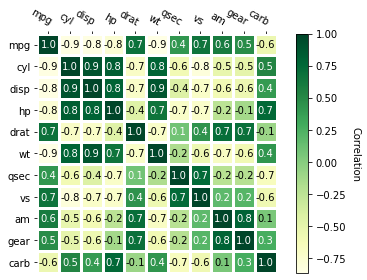

In [9]:
fig, ax = plt.subplots()
im, cbar = heatmap(correlation, data_col, data_col, ax=ax,
                   cmap="YlGn", cbarlabel="Correlation")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
fig.tight_layout()
plt.show()

### **BOXPLOT, Q-Q PLOT, HISTOGRAM & DENSITY PLOT**

Visualisasi menggunakan 3 graph tersebut bertujuan untuk mengetahui persebaran nilai atau distribusi dari suatu variabel. Dari hasil visualisasi 3 graph di bawah yaitu menunjukkan bahwa variabel **mpg** mempunyai distribusi yang normal.

**Boxplot**

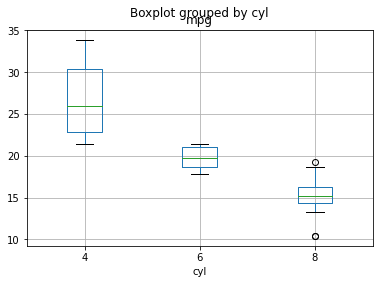

In [27]:
data.boxplot(column='mpg', by='cyl')

**Q-Q Plot**

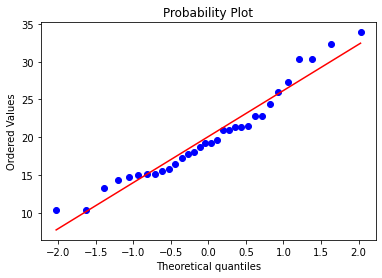

In [28]:
stats.probplot(data['mpg'], dist='norm', plot=py)
py.show()

**Histogram & Density Plot**

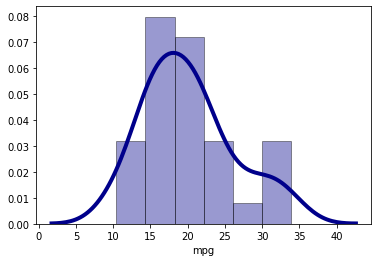

In [28]:
sns.distplot(data['mpg'], hist=True, kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

### **SCATTER PLOT**

Visualisasi dengan **scatter plot** ini bertujuan untuk menunjukkan kemungkinan hubungan atau korelasi antar 2 pasang variabel dan menunjukkan kerekatan hubungan antar 2 pasang variabel tersebut yang diwujudkan sebagai koefisien korelasi.



**Apakah ada hubungan antara variabel 'mpg' dengan variabel 'hp'?**

Pada visualisasi sebelumnya menggunakan **heatmap** menunjukkan bahwa variabel **mpg** dan variabel **hp** memiliki korelasi negatif yang erat yaitu sebesar -0.8. Dengan **scatter plot** ini, korelasi antar 2 variabel tersebut akan dibuktikan dengan lebih mendalam.

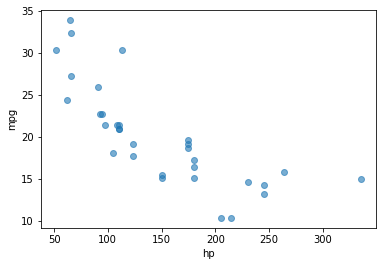

In [31]:
plt.scatter(data['hp'], data['mpg'], alpha=0.6)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()

**Scatter plot** di atas menunjukkan bahwa variabel **mpg** memang memiliki hubungan yang erat dengan variabel **hp**. Artinya, semakin besar horsepower pada suatu mobil membutuhkan konsumsi bahan bakar yang tinggi sehingga jarak yang dapat ditempuh untuk 1 gallon bahan bakar semakin pendek.

Dari **scatter plot** tersebut juga menunjukkan bahwa tren antara **horsepower** dengan **mpg** berupa polynomial. Karena nilai R Square (R2) dihitung menggunakan polynomial line akan semakin mendekati nilai 1 dari menggunakan linear line.

**Linear**

In [0]:
mymodel = np.poly1d(np.polyfit(data['hp'], data['mpg'], 1))
myline = np.linspace(min(data['hp']),max(data['hp']), 100)

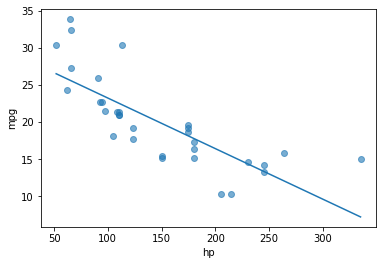

In [35]:
plt.plot(myline, mymodel(myline))
plt.scatter(data['hp'], data['mpg'], alpha=0.6)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()

In [36]:
print(r2_score(data['mpg'], mymodel(data['hp'])))

0.6024373414239341


**Polynomial**

In [0]:
mymodel = np.poly1d(np.polyfit(data['hp'], data['mpg'], 3))
myline = np.linspace(min(data['hp']),max(data['hp']), 100)

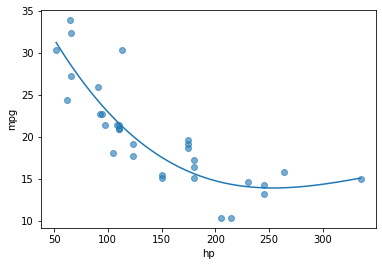

In [38]:
plt.plot(myline, mymodel(myline))
plt.scatter(data['hp'], data['mpg'], alpha=0.6)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()

In [39]:
print(r2_score(data['mpg'], mymodel(data['hp'])))

0.7605734658145943


**Apakah ada hubungan antara variabel 'mpg' dan variabel 'hp' dengan variabel 'cyl'?**

Dengan menambahkan warna pada **scatter plot** sebagai representasi dari variabel **cyl**, didapatkan insight bahwa konsumsi bahan bakar akan lebih hemat jika suatu mobil mempunyai jumlah **cylinder** yang lebih sedikit dan **horsepower** yang lebih rendah.

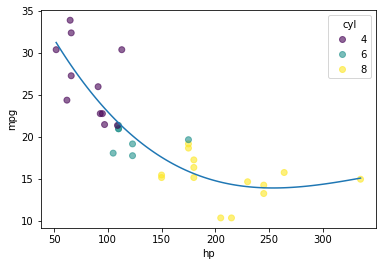

In [40]:
scatter = plt.scatter(data['hp'], data['mpg'], c=data['cyl'], alpha=0.6)
plt.plot(myline, mymodel(myline))
legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                     labels=[str(i) for i in np.unique(data['cyl'])],
                     title='cyl',
                     fancybox=True,
                     loc=1)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()

In [0]:
scaler = MinMaxScaler(feature_range=(0,250))
wt_scaler = scaler.fit_transform(np.array(data['wt']).reshape(-1,1))

In [0]:
scatter = plt.scatter(data['hp'], data['mpg'], c=data['cyl'], 
                      s=wt_scaler, alpha=0.6)
plt.plot(myline, mymodel(myline))
legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                     labels=[str(i) for i in np.unique(data['cyl'])],
                     title='cyl',
                     fancybox=True,
                     loc=1)
handles, labels = scatter.legend_elements(prop='sizes', num=4, alpha=0.6)
plt.legend(handles, labels, loc=3, title='weight')
plt.gca().add_artist(legend1)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()